<a href="https://colab.research.google.com/github/Buddhi1130/Deep_Learning_3/blob/main/google_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
import warnings
import os
warnings.filterwarnings("ignore")

In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahulsah06/gooogle-stock-price")

print("Path to dataset files:", path)

# List files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

Path to dataset files: /root/.cache/kagglehub/datasets/rahulsah06/gooogle-stock-price/versions/1
Files in dataset: ['Google_Stock_Price_Test.csv', 'Google_Stock_Price_Train.csv']


In [16]:
file_path = os.path.join(path, files[1])
df=pd.read_csv(file_path)

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [19]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [20]:
df_new=df[['Date','Open','Close']]

In [21]:
df_new

,Date,Open,Close
0,1/3/2012,325.25,663.59
1,1/4/2012,331.27,666.45
2,1/5/2012,329.83,657.21
3,1/6/2012,328.34,648.24
4,1/9/2012,322.04,620.76
...,...,...,...
1253,12/23/2016,790.90,789.91
1254,12/27/2016,790.68,791.55
1255,12/28/2016,793.70,785.05
1256,12/29/2016,783.33,782.79


In [22]:
df_new['Date']=pd.to_datetime(df_new['Date'].apply(lambda x: x.split(" ")[0]))

In [23]:
type(df['Date'][0])

str

In [24]:
df['Date'][0]

'1/3/2012'

In [25]:
type(df_new['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
df_new['Date'][0]

Timestamp('2012-01-03 00:00:00')

In [27]:
df_new.set_index('Date',drop=True,inplace=True)

In [28]:
df_new

,Open,Close
Date,,
2012-01-03,325.25,663.59
2012-01-04,331.27,666.45
2012-01-05,329.83,657.21
2012-01-06,328.34,648.24
2012-01-09,322.04,620.76
...,...,...
2016-12-23,790.90,789.91
2016-12-27,790.68,791.55
2016-12-28,793.70,785.05


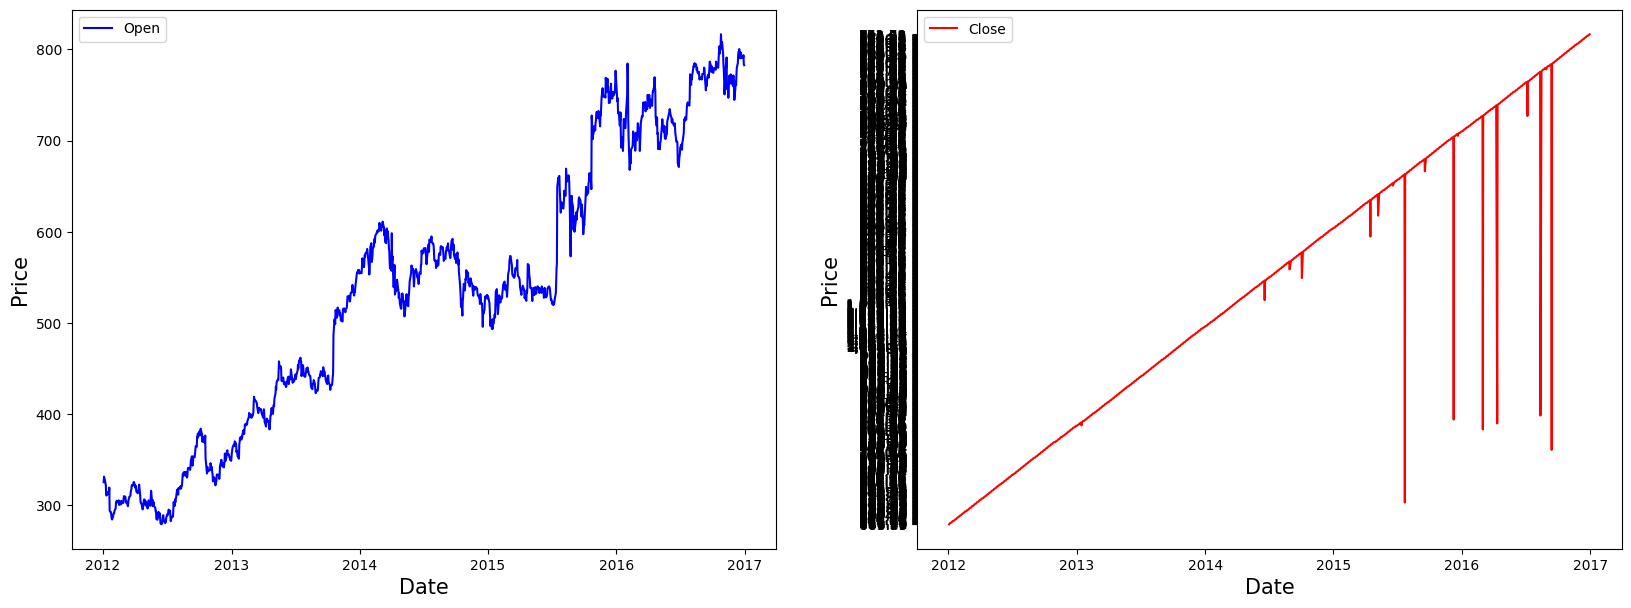

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df_new['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df_new['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [30]:
df_new['Close'] = pd.to_numeric(df_new['Close'], errors='coerce')  # Convert to numeric (float)
print(df_new.dtypes)

Open     float64
Close    float64
dtype: object


In [31]:
# Fill NaN values with the column mean
df_new['Close'].fillna(df_new['Close'].mean(), inplace=True)



In [32]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
df_new[df_new.columns] = MMS.fit_transform(df_new)

In [33]:
df_new

,Open,Close
Date,,
2012-01-03,0.085814,0.400014
2012-01-04,0.097012,0.406650
2012-01-05,0.094334,0.385210
2012-01-06,0.091562,0.364396
2012-01-09,0.079842,0.300631
...,...,...
2016-12-23,0.952043,0.693127
2016-12-27,0.951633,0.696932
2016-12-28,0.957251,0.681850


In [34]:
df_new.shape

(1258, 2)

In [35]:
training_size = round(len(df_new) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [36]:
train_data = df_new[:training_size]
test_data  = df_new[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [37]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
                sequences = []
                labels = []
                start_idx = 0
                for stop_idx in range(50,len(dataset)):                   # Selecting 50 rows at a time
                    sequences.append(dataset.iloc[start_idx:stop_idx])
                    labels.append(dataset.iloc[stop_idx])
                    start_idx += 1
                return (np.array(sequences),np.array(labels))


In [38]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [39]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

In [40]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
train_seq_scaled = scaler.fit_transform(train_seq.reshape(-1, train_seq.shape[-1])).reshape(train_seq.shape)
test_seq_scaled = scaler.transform(test_seq.reshape(-1, test_seq.shape[-1])).reshape(test_seq.shape)

# Scale the target labels (if needed)
train_label_scaled = scaler.fit_transform(train_label)
test_label_scaled = scaler.transform(test_label)

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq_scaled.shape[1], train_seq_scaled.shape[2]), kernel_initializer='glorot_uniform'))
model.add(Dropout(0.1))
model.add(LSTM(units=50, kernel_initializer='glorot_uniform'))
model.add(Dense(2, activation='linear'))  # Linear activation for regression

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Reduced learning rate for stability
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

In [41]:


# Train the model
history = model.fit(
    train_seq_scaled, train_label_scaled,
    epochs=80,
    batch_size=32,  # Adjust batch size based on dataset size
    validation_data=(test_seq_scaled, test_label_scaled),
    verbose=1
)


Epoch 1/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.1858 - mean_absolute_error: 0.3751 - val_loss: 0.2813 - val_mean_absolute_error: 0.5270
Epoch 2/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0847 - mean_absolute_error: 0.2371 - val_loss: 0.0304 - val_mean_absolute_error: 0.1661
Epoch 3/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0128 - mean_absolute_error: 0.0792 - val_loss: 0.0024 - val_mean_absolute_error: 0.0408
Epoch 4/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0051 - mean_absolute_error: 0.0515 - val_loss: 0.0058 - val_mean_absolute_error: 0.0644
Epoch 5/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0042 - mean_absolute_error: 0.0445 - val_loss: 0.0057 - val_mean_absolute_error: 0.0643
Epoch 6/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0038 - mean_absolute_error: 0.0420 - val_loss: 0.0039 - val_mean_absolute_error: 0.0523
Epoch 7/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0039 - mean_absolute_error: 0.0426 - val_loss

In [44]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


array([[0.8314565 , 0.5147925 ],
       [0.83645105, 0.52328163],
       [0.84233236, 0.5326043 ],
       [0.8488054 , 0.5419406 ],
       [0.85517085, 0.55152637]], dtype=float32)

In [45]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[726.07776, 713.055  ],
       [728.7626 , 716.71344],
       [731.92413, 720.73114],
       [735.4038 , 724.7547 ],
       [738.8256 , 728.8858 ]], dtype=float32)

In [48]:


gs_slic_data = pd.concat([df_new.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=df_new.iloc[-202:].index)], axis=1)

In [49]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['Open','Close']]) # Inverse scaling

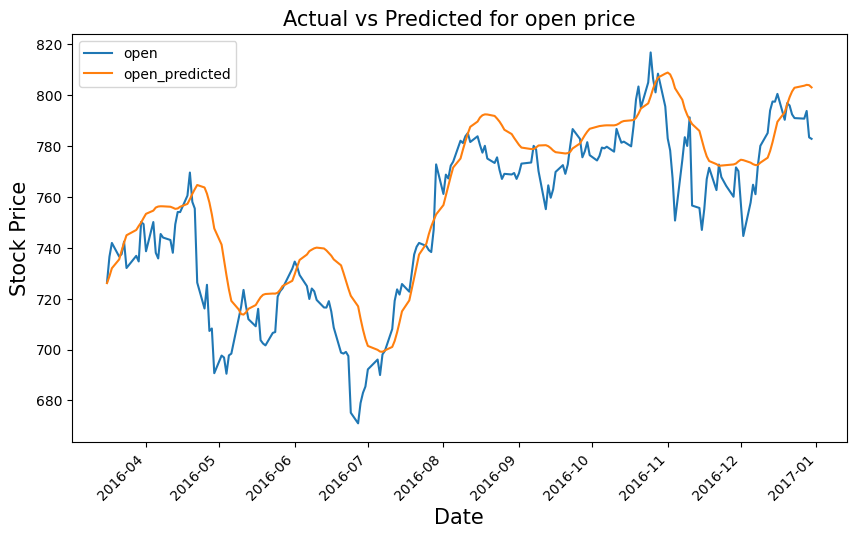

In [50]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

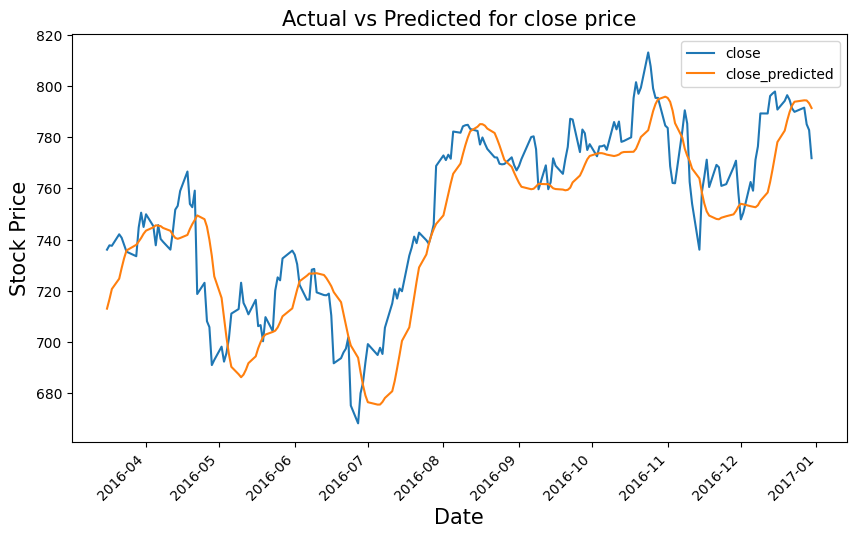

In [51]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [52]:
new_data = pd.DataFrame(
    columns=gs_slic_data.columns,
    index=pd.date_range(start=gs_slic_data.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')  # Start after the last date
)
gs_slic_data = pd.concat([gs_slic_data, new_data])


In [53]:
gs_slic_data

,Open,Close,open_predicted,close_predicted,open,close
2016-03-16,0.832000,0.568243,726.077759,713.054993,726.37,736.09
2016-03-17,0.850752,0.572164,728.762573,716.713440,736.45,737.78
2016-03-18,0.860816,0.571747,731.924133,720.731140,741.86,737.60
2016-03-21,0.850845,0.582165,735.403809,724.754700,736.50,742.09
2016-03-22,0.852630,0.579056,738.825623,728.885803,737.46,740.75
...,...,...,...,...,...,...
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
gs_slic_data['2016-06-09	':'2016-06-14']

,Open,Close,open_predicted,close_predicted,open,close
2016-06-09,0.825489,0.550817,739.746643,726.831299,722.87,728.58
2016-06-10,0.819164,0.529539,740.020020,726.895081,719.47,719.41
2016-06-13,0.813658,0.527102,739.691284,726.189392,716.51,718.36
2016-06-14,0.813602,0.526893,738.924927,724.979614,716.48,718.27


In [55]:
# Generate upcoming_prediction with correct index
upcoming_prediction = pd.DataFrame(
    np.random.rand(10, 2),  # Simulated data
    columns=['open', 'close']
)

In [56]:
start_date = gs_slic_data.index[-1] + pd.Timedelta(days=1)  # One day after the last date
upcoming_dates = pd.date_range(start=start_date, periods=len(upcoming_prediction), freq='D')
upcoming_prediction.index = upcoming_dates  # Assign corrected index

In [57]:
upcoming_prediction

,open,close
2017-01-10,0.440442,0.702751
2017-01-11,0.395049,0.196841
2017-01-12,0.201616,0.412676
2017-01-13,0.747263,0.178004
2017-01-14,0.419317,0.901911
2017-01-15,0.994955,0.398383
2017-01-16,0.032809,0.788611
2017-01-17,0.618667,0.623673
2017-01-18,0.714357,0.604190
2017-01-19,0.219682,0.005760


In [58]:
curr_seq = test_seq[-1:]
for i in range(-10,0):
    up_pred = model.predict(curr_seq)
    upcoming_prediction.iloc[i] = up_pred
    curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
    curr_seq = curr_seq.reshape(test_seq[-1:].shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [59]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

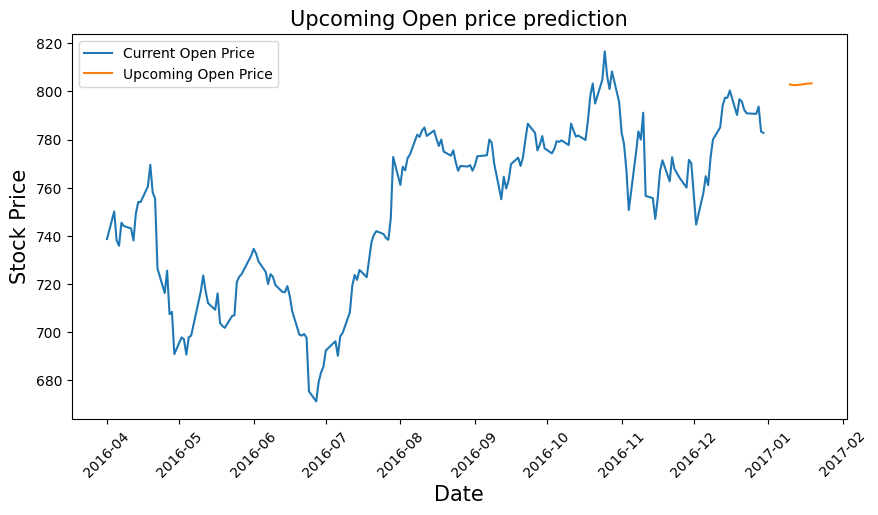

In [60]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2016-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2016-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

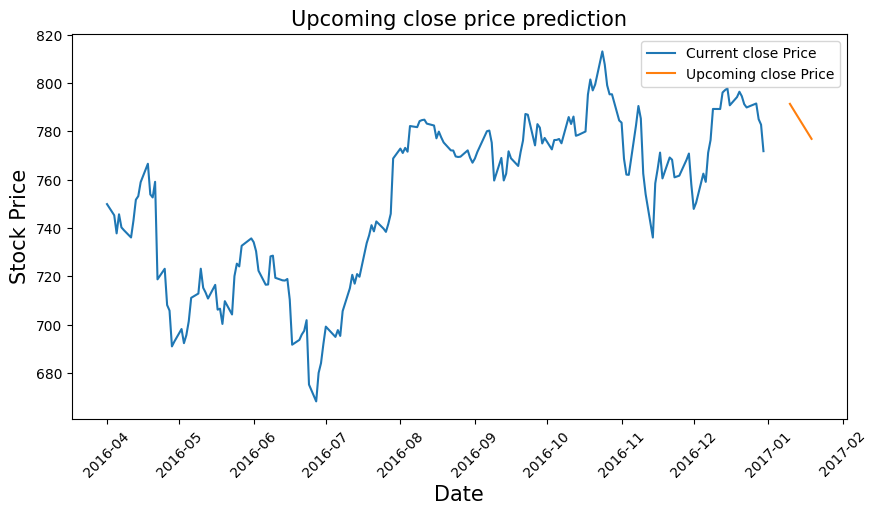

In [61]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2016-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2016-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()

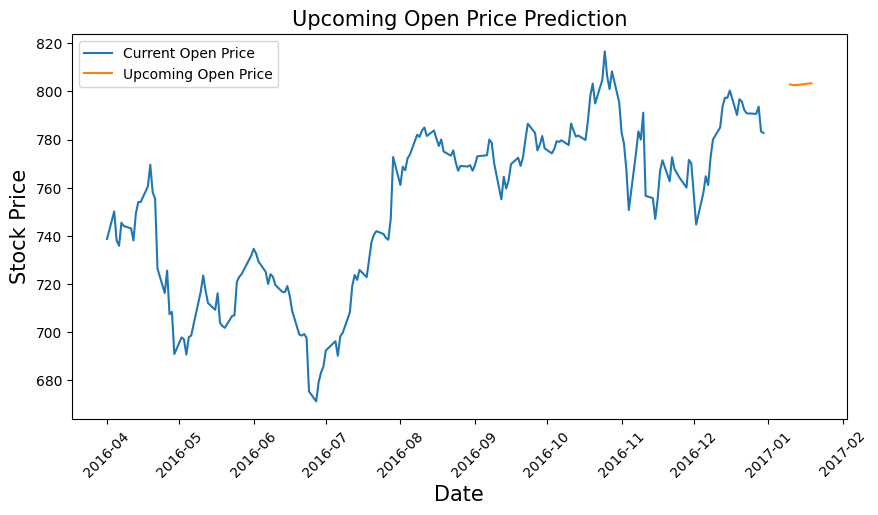

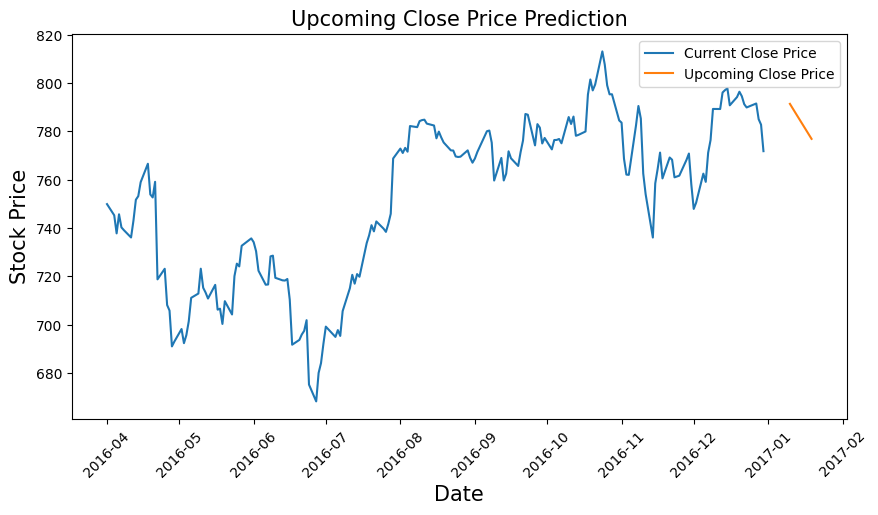

In [62]:
import matplotlib.pyplot as plt

# Handle case sensitivity or missing columns
if 'open' not in gs_slic_data.columns:
    gs_slic_data['open'] = gs_slic_data['Open']
if 'open' not in upcoming_prediction.columns:
    upcoming_prediction['open'] = upcoming_prediction['open_predicted']

if 'close' not in gs_slic_data.columns:
    gs_slic_data['close'] = gs_slic_data['Close']
if 'close' not in upcoming_prediction.columns:
    upcoming_prediction['close'] = upcoming_prediction['close_predicted']

# Plot Open Prices
fg, ax = plt.subplots(figsize=(10, 5))
ax.plot(gs_slic_data.loc['2016-04-01':, 'open'], label='Current Open Price')
ax.plot(upcoming_prediction.loc['2016-04-01':, 'open'], label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date', size=15)
ax.set_ylabel('Stock Price', size=15)
ax.set_title('Upcoming Open Price Prediction', size=15)
ax.legend()
fg.show()

# Plot Close Prices
fg, ax = plt.subplots(figsize=(10, 5))
ax.plot(gs_slic_data.loc['2016-04-01':, 'close'], label='Current Close Price')
ax.plot(upcoming_prediction.loc['2016-04-01':, 'close'], label='Upcoming Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date', size=15)
ax.set_ylabel('Stock Price', size=15)
ax.set_title('Upcoming Close Price Prediction', size=15)
ax.legend()
fg.show()
